In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sber_data = pd.read_csv('data/sber_data.csv')

**Задание 2.2**<br>
Сколько районов Москвы и Московской области представлено в данных?

In [2]:
sber_data['sub_area'].value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

**Задание 2.3**<br>
Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.

In [6]:
sber_data['price_doc'].max()

111111112

**Задание 2.4**<br>
Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

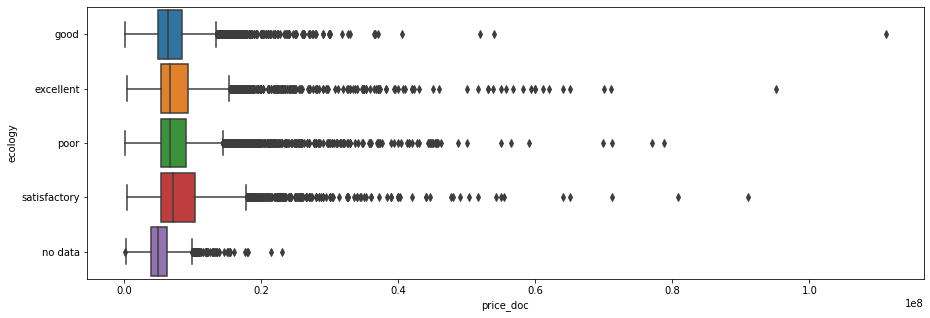

In [10]:
fig = plt.figure(figsize=(15,5))
boxplot = sns.boxplot(
    data=sber_data,
    x='price_doc',
    y='ecology',
    orient='h',
    width=0.9
)

**Задание 2.5**<br>
Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения.

<Figure size 720x504 with 0 Axes>

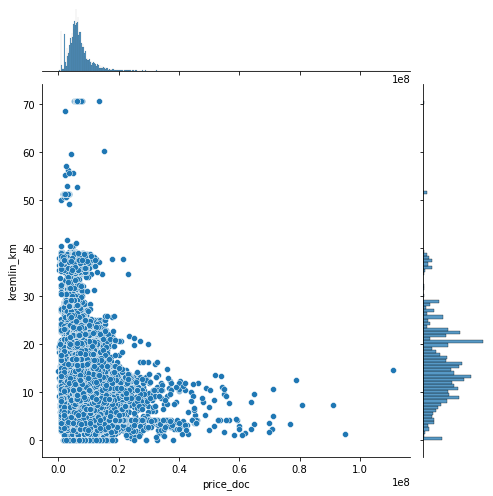

In [19]:
fig = plt.figure(figsize=(10,7))
jointplot = sns.jointplot(data=sber_data, x='price_doc', y='kremlin_km', height=7)

**Задача 4.6**<br>
Вам предоставлен файл test_data.csv. Прочитав этот файл, вы получите вот такой DataFrame:
Ваша задача — очистить данную таблицу от пропусков следующим образом:

Если признак имеет больше 50 % пропущенных значений, удалите его.
Для оставшихся данных: если в строке более двух пропусков, удалите строку.
Для оставшихся данных: числовые признаки заполните средним значением, а категориальные — модой.
У вас должна получиться следующая таблица df:

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('test_data.csv')
thresh = df.shape[0]*0.5
df = df.dropna(thresh=thresh, axis=1)
thresh2= df.shape[1]-2
df = df.dropna(thresh=thresh2, axis=0)
df = df.fillna({
    'one': df['one'].mean(),
    'two': df['two'].mean(),
    'four': df['four'].mode()[0]})

FileNotFoundError: [Errno 2] No such file or directory: 'test_data.csv'

**ЗАДАНИЕ 6.1**<br>
Давайте немного модифицируем функцию outliers_iqr(). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.

In [13]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*left) 
    upper_bound = quartile_3 + (iqr*right)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
#test_sber_data = pd.read_csv('sber_data.csv')
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


**Задание 6.2**<br>
Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?

In [8]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*left) 
    upper_bound = quartile_3 + (iqr*right)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', 1, 6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


**ЗАДАНИЕ 6.3** <br>
Давайте расширим правило трёх сигм, чтобы иметь возможность особенности данных. Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3. Результирующую функцию назовите outliers_z_score_mod().

In [16]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x<lower_bound) | (x >upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', 3, 3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')    

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


**Задание 6.4**<br>
Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно результирующее число выбросов?

**Задание 6.5**<br>
Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

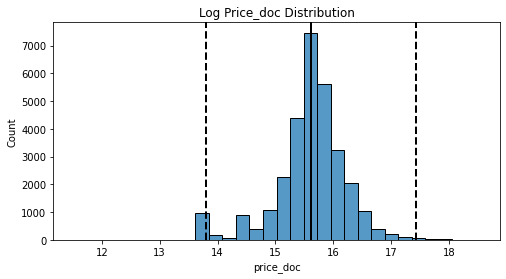

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] +1 )
histplot = sns.histplot(data=log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+3*log_price_doc.std(), color='k', lw=2, ls='--')
histplot.axvline(log_price_doc.mean()-3*log_price_doc.std(), color='k', lw=2, ls='--')
histplot.set_title('Log Price_doc Distribution');

**Задание 6.6**<br>
Найдите потенциальные выбросы с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в в обе стороны распределения. Сколько выбросов вы получили?

In [55]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x<lower_bound) | (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', 3.7, 3.7, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')    

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


**Задание 6.7**<br>
Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [60]:
def outliers_iqr_mod(data, feature, left=3, right=3, log_scale=True):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*left) 
    upper_bound = quartile_3 + (iqr*right)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')    

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379


## 8. Закрепление знаний

Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

In [4]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female
777,5,147,78,0,0,33.7,0.218,65,0,Female


- Pregnancies — количество беременностей.

- Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

- BloodPressure — диастолическое артериальное давление (мм рт. ст.).

- SkinThickness — толщина кожной складки трицепса (мм).

- Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

- BMI — индекс массы тела (\(\frac{вес\ в\ кг}{(рост\ в\ м)^2}\)).

- DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

- Age — возраст.

- Outcome — наличие диабета (0 — нет, 1 — да).

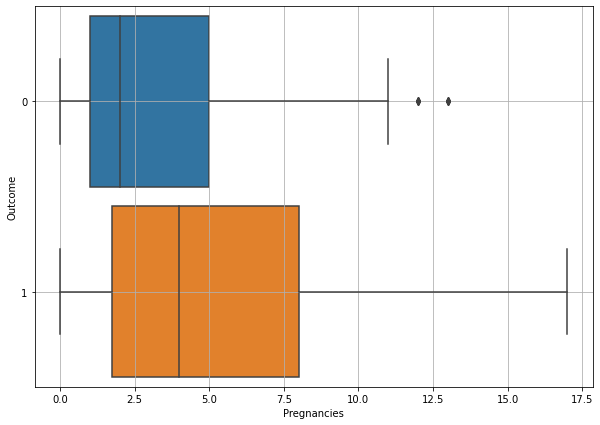

In [7]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=diabetes,
    x='Pregnancies',
    y='Outcome',
    orient='h',
    width=0.9
)
boxplot.grid()

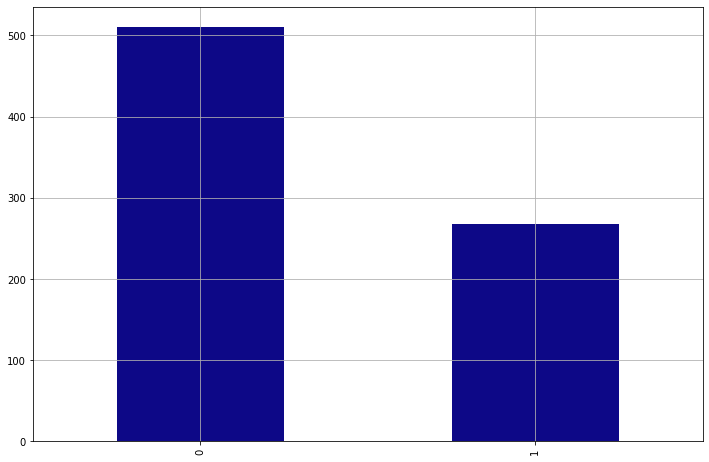

In [22]:
diabetes_df = diabetes['Outcome'].value_counts()
diabetes_df.plot(
    kind='bar',
    grid=True,
    figsize=(12, 8),
    colormap='plasma'
);

**Задание 8.1**<br>
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [8]:
diabetes.index.nunique()  == diabetes.shape[0]

True

In [9]:
dupl_columns = list(diabetes.columns)
mask = diabetes.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')

Число найденных дубликатов: 10


In [10]:
diabetes_dedupped = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Результирующее число записей: 768


In [11]:
low_information_cols = []

for col in diabetes.columns:
    top_freq = diabetes[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
low_information_cols

Gender: 100.0% одинаковых значений


['Gender']

In [12]:
cleared_diabetes = diabetes.drop('Gender', axis=1)
print(f'Результирующее число признаков: {cleared_diabetes.shape[1]}')

Результирующее число признаков: 9


**Задание 8.3**<br>Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [68]:
#cleared_diabetes.items()

<generator object DataFrame.items at 0x000002348E94C740>

In [13]:
def nan_function(x):
    return np.nan if x == 0 else x
cleared_diabetes['Glucose'] = cleared_diabetes['Glucose'].apply(lambda x: np.nan if x == 0 else x)
cleared_diabetes['BloodPressure'] = cleared_diabetes['BloodPressure'].apply(lambda x: np.nan if x == 0 else x)
cleared_diabetes['SkinThickness'] = cleared_diabetes['SkinThickness'].apply(lambda x: np.nan if x == 0 else x)
cleared_diabetes['Insulin'] = cleared_diabetes['Insulin'].apply(lambda x: np.nan if x == 0 else x)
cleared_diabetes['BMI'] = cleared_diabetes['BMI'].apply(lambda x: np.nan if x == 0 else x)
cleared_diabetes.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

**Задание 8.4**<br>
Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [18]:
drop_data = cleared_diabetes.copy()
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
drop_data.shape[1]
drop_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
773,6,103.0,72.0,32.0,37.7,0.324,55,0
774,1,71.0,48.0,18.0,20.4,0.323,22,0
775,0,117.0,NaN,NaN,33.8,0.932,44,0
776,4,154.0,72.0,29.0,31.3,0.338,37,0


**Задание 8.5**<br>
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [21]:
thresh2= drop_data.shape[1]-2
drop_data = drop_data.dropna(thresh=thresh2, axis=0)
drop_data.shape[0]

771

**Задание 8.6**<br>
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [27]:
fill_data = drop_data.copy()
values = {
    'Pregnancies':fill_data['Pregnancies'].median(),
    'Glucose':fill_data['Glucose'].median(),
    'BloodPressure':fill_data['BloodPressure'].median(),
    'SkinThickness':fill_data['SkinThickness'].median(),
    'BMI':fill_data['BMI'].median(),
    'DiabetesPedigreeFunction':fill_data['DiabetesPedigreeFunction'].median()
}
fill_data = fill_data.fillna(values)
fill_data['SkinThickness'].mean().round(1)

29.1

**Задание 8.7**<br>
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [33]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5) 
    upper_bound = quartile_3 + (iqr*1.5)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(fill_data, 'SkinThickness')
outliers['SkinThickness'].count()

87

**Задание 8.8**<br>
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [35]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3*sigma
    upper_bound = mu + 3*sigma
    outliers = data[(x<lower_bound) | (x >upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(fill_data, 'SkinThickness')
outliers['SkinThickness'].count()

4

**Задание 8.9**<br>
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.
Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [40]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5) 
    upper_bound = quartile_3 + (iqr*1.5)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers_nonlog, cleaned_nonlog = outliers_iqr(fill_data, 'DiabetesPedigreeFunction')

def outliers_iqr(data, feature, log_scale=True):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5) 
    upper_bound = quartile_3 + (iqr*1.5)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers_log, cleaned_log = outliers_iqr(fill_data, 'DiabetesPedigreeFunction')

print(outliers_nonlog['DiabetesPedigreeFunction'].count()-outliers_log['DiabetesPedigreeFunction'].count())

29


**Важно!** Это задание на самопроверку, оно необязательное, и мы не будем оценивать качество его решения. Настоятельно рекомендуем вам попробовать найти ответ самостоятельно.

Имеются две базы данных (два листа Excel-файла): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\, /.

Необходимо:

1. Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
2. Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).
3. Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
4. Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).

In [11]:
Data_Parsing = pd.read_excel('C:/Курс DS-3.0/IDE/Python_14_Очистка данных/data/Data_TSUM.xlsx',  sheet_name='Data_Parsing')
Data_Company = pd.read_excel('C:/Курс DS-3.0/IDE/Python_14_Очистка данных/data/Data_TSUM.xlsx',  sheet_name='Data_Company')
display(Data_Parsing)
display(Data_Company)

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164
71,Stone Island,Bags,sssss1111_32,~~~red,158
72,Stone Island,Bags,sssss1111_33,~~~red,194
73,Stone Island,Bags,sssss1111_34,~~~red,256


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


In [45]:
merged = Data_Parsing.merge(Data_Company, left_index=True, right_index=True)
merged.drop(['brand_y', 'Category_y'], axis=1)

,brand_x,Category_x,producer_id,producer_color,price,item_id,color_id,current price
0,Valentino,Shoes,aaaaa1111_11,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa1111_12,black,188,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa1111_13,black,184,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164,sssss111131,red,165
71,Stone Island,Bags,sssss1111_32,~~~red,158,sssss111132,red,196
72,Stone Island,Bags,sssss1111_33,~~~red,194,sssss111133,red,236
73,Stone Island,Bags,sssss1111_34,~~~red,256,sssss111134,red,222


In [46]:
merged['Price_difference'] = merged['price'] - merged['current price']

In [53]:
merged['brand_x'].value_counts()

Valentino       25
Brioni          25
Stone Island    25
Name: brand_x, dtype: int64

In [75]:
merged[merged['brand_x']=='Stone Island']['Price_difference'].describe()

count     25.000000
mean      -3.040000
std       56.059849
min      -90.000000
25%      -42.000000
50%       -9.000000
75%       34.000000
max      103.000000
Name: Price_difference, dtype: float64

In [73]:
merged[(merged['brand_x']=='Brioni') & (merged['Price_difference'] < -30)]['Price_difference'].count()

5

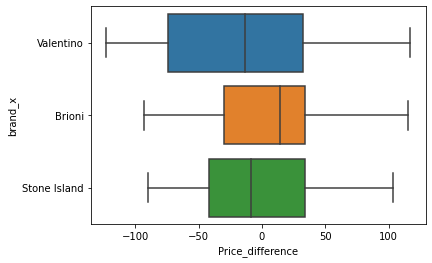

In [60]:
boxplot = sns.boxplot(data=merged, x='Price_difference', y='brand_x');

In [76]:
mask_Valentino = merged['brand_x']=='Valentino'
mask_Brioni = merged['brand_x']=='Brioni'
mask_Stone_Island = merged['brand_x']=='Stone Island'

In [84]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5) 
    upper_bound = quartile_3 + (iqr*1.5)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(merged[mask_Stone_Island], 'Price_difference')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 25
